# 📝 Data Wrangling – Part 2
🎯 Objective

In this notebook, we extend our movie-level dataset by incorporating crew information: directors, writers, and other names associated with a title.
This step ensures we can later explore relationships like:

Director/Writer influence on ratings.

Star power and collaborations.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

📂 Step 1: Load Crew and Names Data

title.crew → contains tconst, directors, and writers.

name.basics → contains nconst, primaryName, birthYear, deathYear, and primaryProfession.

Title.crew

In [3]:
crew=pd.read_csv('../data/title.crew.tsv',sep='\t',low_memory=False,encoding='utf-8')
crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
11819904,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
11819905,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
11819906,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
11819907,tt9916856,nm10538645,nm6951431


In [ ]:
df3=crew

🧹 Step 2: Clean Crew Data

Split multiple directors/writers (comma-separated) into lists.

Handle missing or "\\N" values.

Ensure all references map properly to valid nconst IDs.

In [ ]:
df3.rename(columns={'tconst':"movieID"}, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11819909 entries, 0 to 11819908
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   movieID    object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 270.5+ MB


In [ ]:
df3.isnull().sum()

movieID      0
directors    0
writers      0
dtype: int64

In [ ]:
df3['writers'].unique()

array(['\\N', 'nm0721526', 'nm0085156', ..., 'nm10538639',
       'nm6687687,nm10538642,nm9641593,nm10538643', 'nm6951431'],
      shape=(1440990,), dtype=object)

In [ ]:
df3['writers'] = df3['writers'].replace('\\N', np.nan)
df3['directors'] = df3['directors'].replace('\\N', np.nan)

In [ ]:
df3.isnull().sum()

movieID            0
directors    5144671
writers      5817101
dtype: int64

In [ ]:
df3.dropna(subset=['directors','writers'], inplace=True)
df3.isnull().sum()

movieID      0
directors    0
writers      0
dtype: int64

In [ ]:
df3.to_csv('../temp/crew.csv', index=False)

In [ ]:
maindf1=pd.read_csv('../temp/maindfs/maindf1.csv')

In [ ]:
maindf2=maindf1.merge(df3, on='movieID', how='left')
maindf2

,movieID,title,year,runtime,genre,rating,votes,directors,writers
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,228.0,nm0085156,nm0085156
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.2,564.0,NaN,NaN
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879
3,tt0000591,The Prodigal Son,1907,90,Drama,5.3,34.0,nm0141150,nm0141150
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.0,80.0,"nm0091767,nm0877783","nm0000875,nm0877783"
...,...,...,...,...,...,...,...,...,...
293598,tt9916190,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,264.0,nm7308376,nm7308376
293599,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269"
293600,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432"
293601,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,7.6,12.0,nm4457074,"nm4843252,nm4900525,nm2679404"


In [ ]:
maindf2.dropna(subset=['writers','directors'], inplace=True)
maindf2

,movieID,title,year,runtime,genre,rating,votes,directors,writers
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,228.0,nm0085156,nm0085156
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879
3,tt0000591,The Prodigal Son,1907,90,Drama,5.3,34.0,nm0141150,nm0141150
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.0,80.0,"nm0091767,nm0877783","nm0000875,nm0877783"
5,tt0000941,Locura de amor,1909,45,Drama,4.3,33.0,"nm0063413,nm0550220","nm0063413,nm0550220,nm0848502"
...,...,...,...,...,...,...,...,...,...
293598,tt9916190,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,264.0,nm7308376,nm7308376
293599,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269"
293600,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432"
293601,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,7.6,12.0,nm4457074,"nm4843252,nm4900525,nm2679404"


In [ ]:
maindf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262240 entries, 0 to 293602
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieID    262240 non-null  object 
 1   title      262240 non-null  object 
 2   year       262240 non-null  Int64  
 3   runtime    262240 non-null  Int64  
 4   genre      262240 non-null  object 
 5   rating     262240 non-null  float64
 6   votes      262240 non-null  float64
 7   directors  262240 non-null  object 
 8   writers    262240 non-null  object 
dtypes: Int64(2), float64(2), object(5)
memory usage: 20.5+ MB


In [ ]:
maindf2.describe()

,year,runtime,rating,votes
count,262240.0,262240.0,262240.000000,2.622400e+05
mean,1995.814311,94.941004,6.076017,4.598507e+03
std,26.628914,157.698131,1.328737,4.169235e+04
min,1894.0,1.0,1.000000,5.000000e+00
25%,1979.0,82.0,5.300000,2.700000e+01
50%,2007.0,91.0,6.200000,9.700000e+01
75%,2017.0,104.0,7.000000,4.810000e+02
max,2025.0,59460.0,10.000000,3.079063e+06


In [ ]:
etc1=maindf2.copy()
etc1['writers']= maindf2['writers'].str.split(',')
etc1= etc1.explode('writers')
etc1['writers'].value_counts()

writers
nm0000636     376
nm0960106     263
nm0876561     244
nm0649320     222
nm0393250     207
             ... 
nm1376332       1
nm10534967      1
nm7011994       1
nm10534135      1
nm0676645       1
Name: count, Length: 212834, dtype: int64

In [ ]:
etc1['writers'].unique()

array(['nm0085156', 'nm0846879', 'nm0141150', ..., 'nm10538402',
       'nm3471432', 'nm10538612'], shape=(212834,), dtype=object)

In [ ]:
etc2=maindf2.copy()
etc2['directors']= maindf2['directors'].str.split(',')
etc2= etc2.explode('directors')
etc2['directors'].value_counts()


directors
nm0627864     205
nm0001238     172
nm0064415     151
nm0484645     134
nm0782947     134
             ... 
nm4942142       1
nm10570118      1
nm7492822       1
nm16870722      1
nm7011994       1
Name: count, Length: 118798, dtype: int64

In [ ]:
etc2['directors'].unique()

array(['nm0085156', 'nm0846879', 'nm0141150', ..., 'nm5412267',
       'nm7308376', 'nm10538612'], shape=(118798,), dtype=object)

Top 20 directors (just by rating)

<Axes: title={'center': 'Top 20 Directors by Average Rating'}, xlabel='directors'>

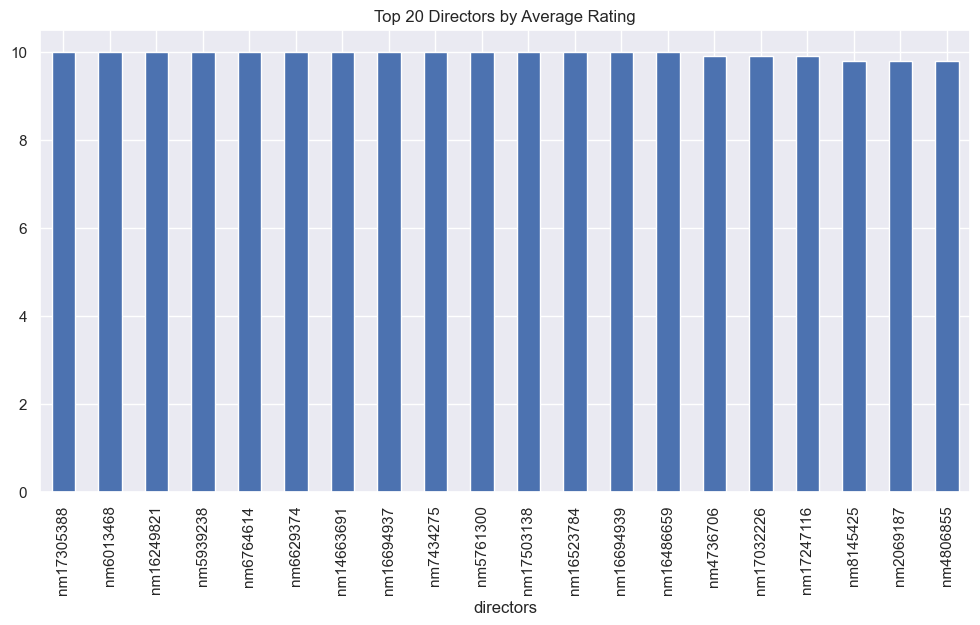

In [ ]:
avg_rating_per_director = etc2.groupby('directors')['rating'].mean()
top_directors = avg_rating_per_director.sort_values(ascending=False).head(20)
top_directors.plot(kind='bar', figsize=(12, 6), title='Top 20 Directors by Average Rating')

<Axes: title={'center': 'Top 20 Writers by Average Rating'}, xlabel='writers'>

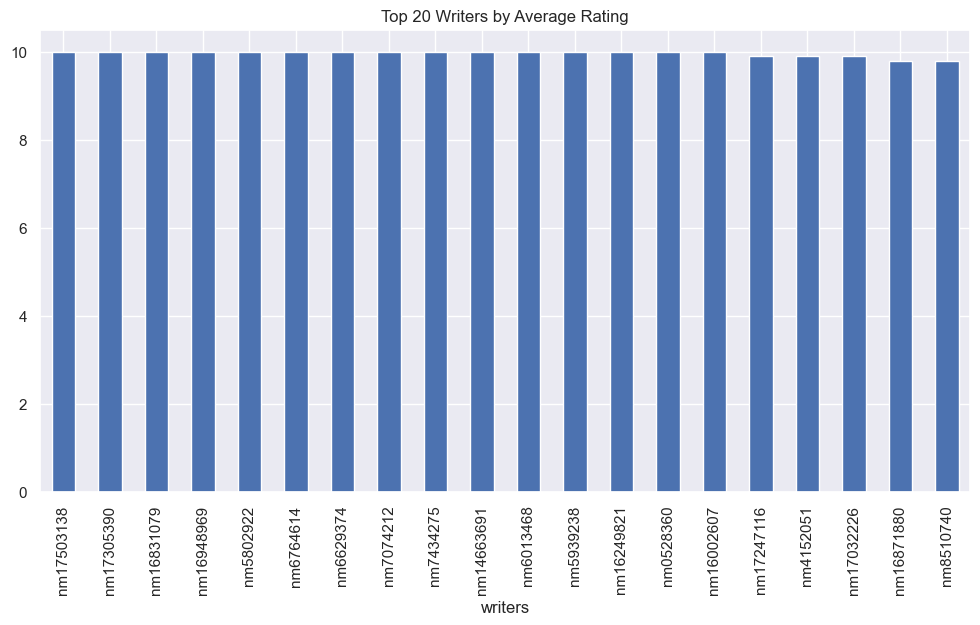

In [ ]:
avg_rating_per_writer = etc1.groupby('writers')['rating'].mean()
top_writer = avg_rating_per_writer.sort_values(ascending=False).head(20)
top_writer.plot(kind='bar', figsize=(12, 6), title='Top 20 Writers by Average Rating')

In [ ]:
maindf2.to_csv('../temp/maindf2.csv', index=False)

Name.basics data

In [ ]:
name=pd.read_csv('../data/name.basics.tsv',sep='\t',low_memory=False,encoding='utf-8')
name

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0025164"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"
...,...,...,...,...,...,...
14611836,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt14069590,tt2455546"
14611837,nm9993716,Essias Loberg,\N,\N,\N,\N
14611838,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
14611839,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [ ]:
df4=name
df4

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0025164"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"
...,...,...,...,...,...,...
14611836,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt14069590,tt2455546"
14611837,nm9993716,Essias Loberg,\N,\N,\N,\N
14611838,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
14611839,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


- Removing irrelavant columns

In [ ]:
df4.drop(columns=['birthYear', 'deathYear', 'primaryProfession', 'knownForTitles'], inplace=True)

In [ ]:
df4.rename(columns={'primaryName':"name"}, inplace=True)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14611841 entries, 0 to 14611840
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   nconst  object
 1   name    object
dtypes: object(2)
memory usage: 223.0+ MB


In [ ]:
df4.isnull().sum()

nconst    0
name      9
dtype: int64

In [ ]:
df4['name'].replace('\\N', np.nan, inplace=True)
df4['name'].isnull().sum()

C:\Users\vedan\AppData\Local\Temp\ipykernel_16716\4216412935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['name'].replace('\\N', np.nan, inplace=True)


np.int64(68)

In [ ]:
df4.dropna(subset=['name'], inplace=True)

In [ ]:
df4['name']

0                 Fred Astaire
1                Lauren Bacall
2              Brigitte Bardot
3                 John Belushi
4               Ingmar Bergman
                   ...        
14611836     Romeo del Rosario
14611837         Essias Loberg
14611838    Harikrishnan Rajan
14611839           Aayush Nair
14611840            Andre Hill
Name: name, Length: 14611773, dtype: object

In [ ]:
df4.to_csv('../temp/name.csv', index=False) 

In [ ]:
df3=pd.read_csv('../temp/dfs/crew.csv')

The Exploited df Strategy

The `directors` and `writers` columns contain multiple IDs in a single string (e.g., 'nm00001,nm00002'). A direct merge is impossible. Our strategy is to **reshape** the data into a "long" format.

1.  **Split**: Convert the comma-separated strings into lists of IDs.
2.  **Explode**: Use the `.explode()` function to create a new row for each ID in the list.
3.  **Assign Role**: Create a new `role` column to keep track of whether the person is a 'director' or a 'writer'.
4.  **Concatenate**: Stack the processed director and writer data together.

This creates a clean, tidy DataFrame where each row represents one person's contribution to one movie, which is perfect for merging.

In [ ]:
df3

,movieID,directors,writers
0,tt0000003,nm0721526,nm0721526
1,tt0000009,nm0085156,nm0085156
2,tt0000015,nm0721526,nm0721526
3,tt0000036,nm0005690,nm0410331
4,tt0000076,nm0005690,nm0410331
...,...,...,...
5125675,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
5125676,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
5125677,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
5125678,tt9916856,nm10538645,nm6951431


In [ ]:
etc3=df3[['movieID','directors']]
etc3['directors'] = etc3['directors'].str.split(',')
etc3=etc3.explode('directors')
etc3.rename(columns={'directors': 'personID'}, inplace=True)
etc3['role']='director'
etc3

C:\Users\vedan\AppData\Local\Temp\ipykernel_26824\2033051010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etc3['directors'] = etc3['directors'].str.split(',')


,movieID,personID,role
0,tt0000003,nm0721526,director
1,tt0000009,nm0085156,director
2,tt0000015,nm0721526,director
3,tt0000036,nm0005690,director
4,tt0000076,nm0005690,director
...,...,...,...
5125675,tt9916848,nm1485677,director
5125676,tt9916850,nm1485677,director
5125677,tt9916852,nm1485677,director
5125678,tt9916856,nm10538645,director


In [ ]:
etc3['personID'].value_counts()

personID
nm1203430     13007
nm8467983     11779
nm1966600     11722
nm1409127     10362
nm1083609      8372
              ...  
nm10531554        1
nm10538193        1
nm10538028        1
nm10529686        1
nm1943534         1
Name: count, Length: 695781, dtype: int64

In [ ]:
etc4=df3[['movieID','writers']]
etc4['writers'] = etc4['writers'].str.split(',')
etc4=etc4.explode('writers')
etc4.rename(columns={'writers': 'personID'}, inplace=True)
etc4['role']='writer'
etc4

C:\Users\vedan\AppData\Local\Temp\ipykernel_26824\1676941008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etc4['writers'] = etc4['writers'].str.split(',')


,movieID,personID,role
0,tt0000003,nm0721526,writer
1,tt0000009,nm0085156,writer
2,tt0000015,nm0721526,writer
3,tt0000036,nm0410331,writer
4,tt0000076,nm0410331,writer
...,...,...,...
5125677,tt9916852,nm9299459,writer
5125677,tt9916852,nm1628284,writer
5125678,tt9916856,nm6951431,writer
5125679,tt9916880,nm1482639,writer


In [ ]:
etc4['personID'].value_counts()

personID
nm6352729     25015
nm0438471     19405
nm0914844     14608
nm5203198     13407
nm0068589     13299
              ...  
nm1856940         1
nm1304340         1
nm10531554        1
nm10538193        1
nm10538108        1
Name: count, Length: 1050023, dtype: int64

In [ ]:
df5=pd.concat([etc3, etc4], ignore_index=True)

In [ ]:
df5['personID'] = df5['personID'].str.strip()

In [ ]:
df5

,movieID,personID,role
0,tt0000003,nm0721526,director
1,tt0000009,nm0085156,director
2,tt0000015,nm0721526,director
3,tt0000036,nm0005690,director
4,tt0000076,nm0005690,director
...,...,...,...
19393180,tt9916852,nm9299459,writer
19393181,tt9916852,nm1628284,writer
19393182,tt9916856,nm6951431,writer
19393183,tt9916880,nm1482639,writer


In [ ]:
df5 = df5.loc[:, ~df5.columns.duplicated()]

In [ ]:
df5[df5['movieID']=='tt9916852']

,movieID,personID,role
7072876,tt9916852,nm1485677,director
19393177,tt9916852,nm9187127,writer
19393178,tt9916852,nm1485677,writer
19393179,tt9916852,nm9826385,writer
19393180,tt9916852,nm9299459,writer
19393181,tt9916852,nm1628284,writer


In [ ]:
df5

,movieID,personID,role
0,tt0000003,nm0721526,director
1,tt0000009,nm0085156,director
2,tt0000015,nm0721526,director
3,tt0000036,nm0005690,director
4,tt0000076,nm0005690,director
...,...,...,...
19393180,tt9916852,nm9299459,writer
19393181,tt9916852,nm1628284,writer
19393182,tt9916856,nm6951431,writer
19393183,tt9916880,nm1482639,writer


In [ ]:
df5.isnull().sum()

movieID     0
personID    0
role        0
dtype: int64

In [ ]:
print(df5['role'].value_counts())

role
writer      12320306
director     7072879
Name: count, dtype: int64


In [ ]:
df4=pd.read_csv('../temp/dfs/name.csv')

In [ ]:
df4

,nconst,name
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman
...,...,...
14611768,nm9993714,Romeo del Rosario
14611769,nm9993716,Essias Loberg
14611770,nm9993717,Harikrishnan Rajan
14611771,nm9993718,Aayush Nair


In [ ]:
df4.rename(columns={'nconst':"personID"}, inplace=True)
df4

,personID,name
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman
...,...,...
14611768,nm9993714,Romeo del Rosario
14611769,nm9993716,Essias Loberg
14611770,nm9993717,Harikrishnan Rajan
14611771,nm9993718,Aayush Nair


In [ ]:
subdf1=pd.merge(df5,df4,on='personID', how='left')
subdf1

,movieID,personID,role,name
0,tt0000003,nm0721526,director,Émile Reynaud
1,tt0000009,nm0085156,director,Alexander Black
2,tt0000015,nm0721526,director,Émile Reynaud
3,tt0000036,nm0005690,director,William K.L. Dickson
4,tt0000076,nm0005690,director,William K.L. Dickson
...,...,...,...,...
19393180,tt9916852,nm9299459,writer,Nur Özlem Elginöz
19393181,tt9916852,nm1628284,writer,Birol Güven
19393182,tt9916856,nm6951431,writer,Johan Planefeldt
19393183,tt9916880,nm1482639,writer,Lucinda Whiteley


In [ ]:
subdf1.isnull().sum()

movieID        0
personID       0
role           0
name        2012
dtype: int64

In [ ]:
subdf1.dropna(subset=['name'], inplace=True)

In [ ]:
maindf2=pd.read_csv('../temp/maindfs/maindf2.csv')

In [ ]:
maindf2

,movieID,title,year,runtime,genre,rating,votes,directors,writers
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,228.0,nm0085156,nm0085156
1,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879
2,tt0000591,The Prodigal Son,1907,90,Drama,5.3,34.0,nm0141150,nm0141150
3,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.0,80.0,"nm0091767,nm0877783","nm0000875,nm0877783"
4,tt0000941,Locura de amor,1909,45,Drama,4.3,33.0,"nm0063413,nm0550220","nm0063413,nm0550220,nm0848502"
...,...,...,...,...,...,...,...,...,...
262235,tt9916190,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,264.0,nm7308376,nm7308376
262236,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269"
262237,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432"
262238,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,7.6,12.0,nm4457074,"nm4843252,nm4900525,nm2679404"


# 🔗 Merge Crew with Names

Expand crew IDs so each row links a movieID to a personID with their role (director or writer).

Join with name.basics to get actual names.

Result → A mapping of each movie to its crew with proper names and roles.

In [ ]:
maindf3=maindf2.merge(subdf1, on='movieID', how='left')

In [ ]:
maindf3

,movieID,title,year,runtime,genre,rating,votes,directors,writers,personID,role,name
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,228.0,nm0085156,nm0085156,nm0085156,director,Alexander Black
1,tt0000009,Miss Jerry,1894,45,Romance,5.3,228.0,nm0085156,nm0085156,nm0085156,writer,Alexander Black
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,director,Charles Tait
3,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,writer,Charles Tait
4,tt0000591,The Prodigal Son,1907,90,Drama,5.3,34.0,nm0141150,nm0141150,nm0141150,director,Michel Carré
...,...,...,...,...,...,...,...,...,...,...,...,...
805484,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,7.6,12.0,nm4457074,"nm4843252,nm4900525,nm2679404",nm4843252,writer,Arief Ash Shiddiq
805485,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,7.6,12.0,nm4457074,"nm4843252,nm4900525,nm2679404",nm4900525,writer,Rino Sarjono
805486,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,7.6,12.0,nm4457074,"nm4843252,nm4900525,nm2679404",nm2679404,writer,Salman Aristo
805487,tt9916730,6 Gunn,2017,116,Drama,7.0,13.0,nm10538612,nm10538612,nm10538612,director,Kiran Gawade


In [ ]:
maindf3=maindf3[maindf3['votes']>500]
maindf3

,movieID,title,year,runtime,genre,rating,votes,directors,writers,personID,role,name
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,director,Charles Tait
3,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1009.0,nm0846879,nm0846879,nm0846879,writer,Charles Tait
47,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,director,Charles L. Gaskill
48,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0765026,writer,Victorien Sardou
49,tt0002101,Cleopatra,1912,100,"Drama,History",5.1,650.0,nm0309130,"nm0765026,nm0309130",nm0309130,writer,Charles L. Gaskill
...,...,...,...,...,...,...,...,...,...,...,...,...
805478,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm10538402,writer,Lorenzo Collalti
805479,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1512.0,nm1480867,"nm1480867,nm10538402,nm5584269",nm5584269,writer,Alessandro Regaldo
805480,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,director,Pablo Agüero
805481,tt9916362,Coven,2020,92,"Drama,History",6.4,6098.0,nm1893148,"nm1893148,nm3471432",nm1893148,writer,Pablo Agüero


In [ ]:
maindf3.isnull().sum()

movieID      0
title        0
year         0
runtime      0
genre        0
rating       0
votes        0
directors    0
writers      0
personID     0
role         0
name         0
dtype: int64

<Axes: title={'center': 'Top 30 Persons by Average Rating'}, xlabel='name'>

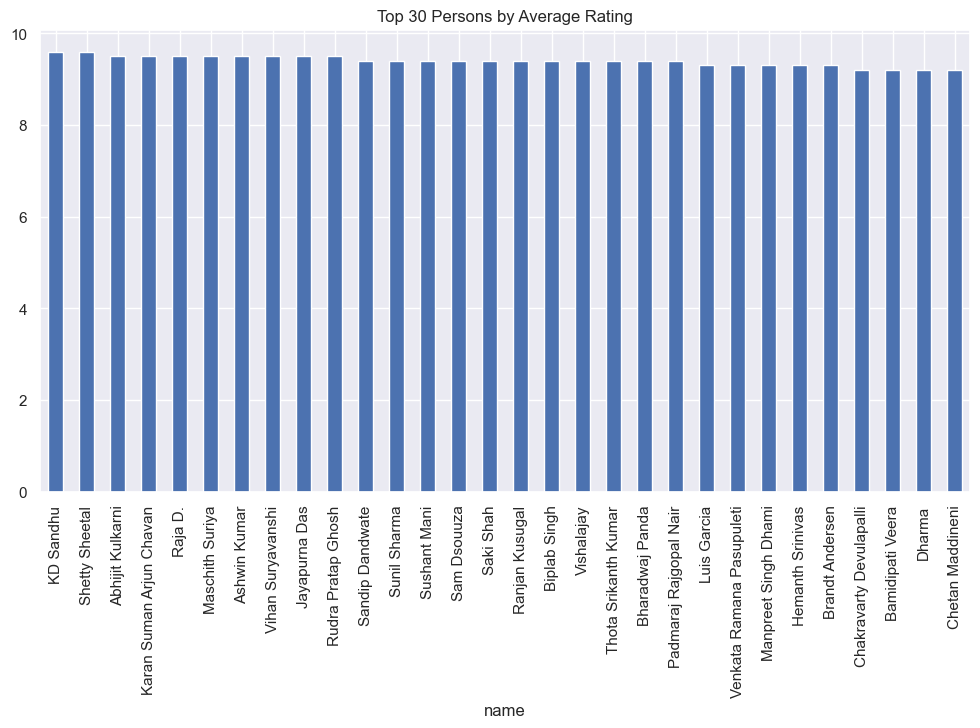

In [ ]:
mainPersons = maindf3.groupby('name')['rating'].mean()
mainPersons = mainPersons.sort_values(ascending=False).head(30)
mainPersons.plot(kind='bar', figsize=(12, 6), title='Top 30 Persons by Average Rating')

<Axes: title={'center': 'Top 30 Movies by Average Rating'}, xlabel='title'>

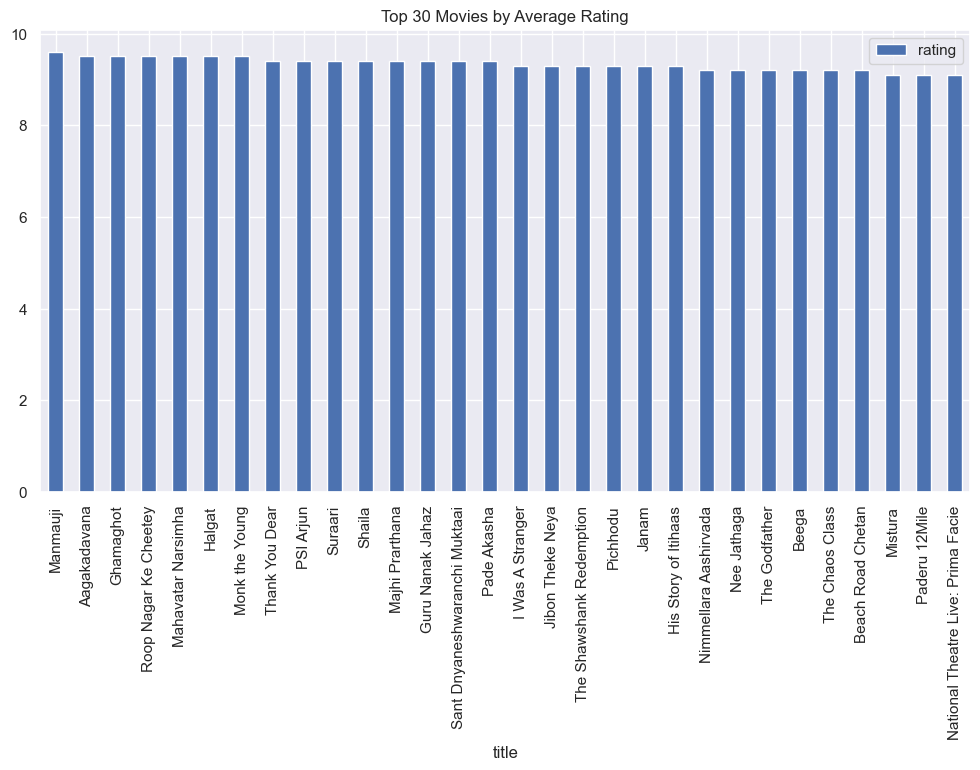

In [ ]:
movieRated=maindf3.groupby('title')['rating'].mean().reset_index()
movieRated=movieRated.sort_values(by='rating', ascending=False).head(30)
movieRated.plot(kind='bar', x='title', y='rating', figsize=(12, 6), title='Top 30 Movies by Average Rating')


In [ ]:
maindf3.to_csv('../temp/dfs/maindf3.csv', index=False, encoding='utf-8-sig')

✅ Outcome of Part 2

We have successfully created `maindf3`, a significantly enriched DataFrame. It now links every movie from our core dataset to its respective directors and writers, complete with their names and roles.

This new dataset unlocks the ability to perform much deeper analyses, such as:
-   Finding the highest-rated directors.
-   Analyzing career arcs and breakout films.
-   Investigating the impact of writers on a film's success.